# IMPORTING LIBRARIES

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTING THE DATA

In [23]:
df=pd.read_csv("binary_classification_data2.csv")
df

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Payment_Method,Contract_Type,Has_AutoPay,Num_Complaints,...,Data_Overage_Fees,Has_Streaming_Service,Num_Devices_Connected,Region,Income_Level,Marital_Status,Has_Referral,Last_Upgrade_Months_Ago,Avg_Session_Duration_Minutes,Churn
0,CUST1000,56,Female,16,102.64,119.38,Crypto,Yearly,Yes,0,...,49.06,No,7,South,Low,Divorced,Yes,47,60.57,yes
1,CUST1001,69,Female,13,196.41,337.59,Debit Card,Yearly,Yes,7,...,12.83,Yes,5,West,High,Divorced,Yes,52,101.40,yes
2,CUST1002,46,Male,30,108.67,14.76,PayPal,Yearly,No,3,...,32.71,Yes,1,North,Medium,Married,Yes,34,46.56,no
3,CUST1003,32,Female,19,79.18,56.53,Crypto,Monthly,No,2,...,9.90,No,8,East,High,Divorced,Yes,21,103.88,yes
4,CUST1004,60,Male,17,134.01,400.96,Crypto,Yearly,No,6,...,28.27,Yes,4,North,High,Single,No,37,51.78,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CUST1295,19,Male,10,48.11,272.29,Credit Card,Monthly,No,5,...,30.40,Yes,9,West,High,Divorced,No,17,53.21,yes
296,CUST1296,70,Male,17,148.88,391.02,PayPal,Monthly,No,5,...,15.47,No,2,East,Medium,Single,Yes,12,24.34,yes
297,CUST1297,61,Male,10,138.61,57.96,Crypto,Monthly,No,8,...,41.19,No,2,South,Low,Divorced,No,15,106.12,no
298,CUST1298,43,Female,17,24.88,381.71,PayPal,Monthly,Yes,5,...,47.75,Yes,7,West,Medium,Single,Yes,8,69.06,yes


In [25]:
df = df.drop(df.columns[0], axis=1)
df

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Payment_Method,Contract_Type,Has_AutoPay,Num_Complaints,Support_Calls_Made,Data_Overage_Fees,Has_Streaming_Service,Num_Devices_Connected,Region,Income_Level,Marital_Status,Has_Referral,Last_Upgrade_Months_Ago,Avg_Session_Duration_Minutes,Churn
0,56,Female,16,102.64,119.38,Crypto,Yearly,Yes,0,1,49.06,No,7,South,Low,Divorced,Yes,47,60.57,yes
1,69,Female,13,196.41,337.59,Debit Card,Yearly,Yes,7,12,12.83,Yes,5,West,High,Divorced,Yes,52,101.40,yes
2,46,Male,30,108.67,14.76,PayPal,Yearly,No,3,4,32.71,Yes,1,North,Medium,Married,Yes,34,46.56,no
3,32,Female,19,79.18,56.53,Crypto,Monthly,No,2,14,9.90,No,8,East,High,Divorced,Yes,21,103.88,yes
4,60,Male,17,134.01,400.96,Crypto,Yearly,No,6,3,28.27,Yes,4,North,High,Single,No,37,51.78,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,19,Male,10,48.11,272.29,Credit Card,Monthly,No,5,11,30.40,Yes,9,West,High,Divorced,No,17,53.21,yes
296,70,Male,17,148.88,391.02,PayPal,Monthly,No,5,7,15.47,No,2,East,Medium,Single,Yes,12,24.34,yes
297,61,Male,10,138.61,57.96,Crypto,Monthly,No,8,13,41.19,No,2,South,Low,Divorced,No,15,106.12,no
298,43,Female,17,24.88,381.71,PayPal,Monthly,Yes,5,8,47.75,Yes,7,West,Medium,Single,Yes,8,69.06,yes


# Label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all string columns
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of string type
        df[column] = label_encoder.fit_transform(df[column])

print(df)

     Age  Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0     56       0                          16        102.64          119.38   
1     69       0                          13        196.41          337.59   
2     46       1                          30        108.67           14.76   
3     32       0                          19         79.18           56.53   
4     60       1                          17        134.01          400.96   
..   ...     ...                         ...           ...             ...   
295   19       1                          10         48.11          272.29   
296   70       1                          17        148.88          391.02   
297   61       1                          10        138.61           57.96   
298   43       0                          17         24.88          381.71   
299   49       0                          20         59.95          272.93   

     Payment_Method  Contract_Type  Has_AutoPay  Num_Complaints

# FINDING OUTLIERS

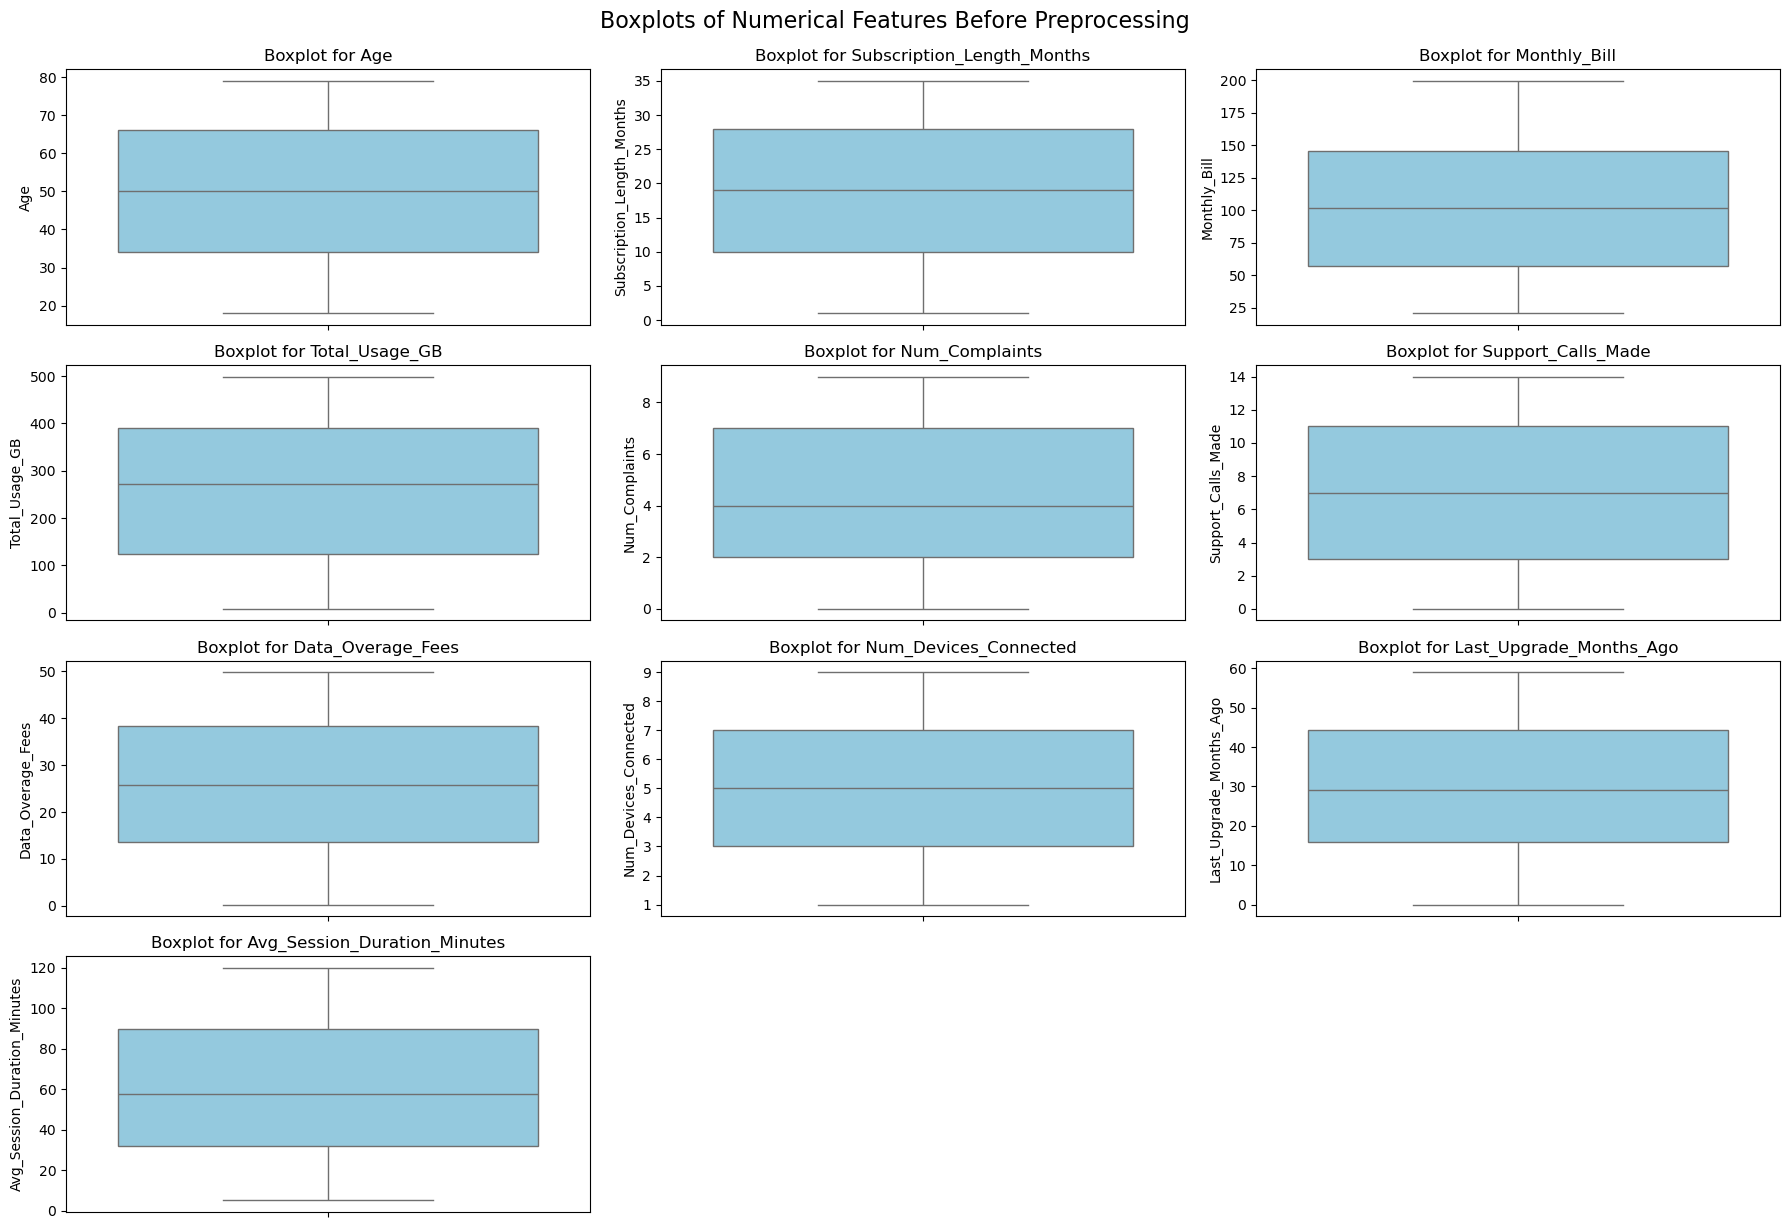

In [29]:

# Select numeric columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# ------------------ Boxplots ------------------
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features Before Preprocessing", fontsize=16, y=1.02)
plt.show()



# Histograms

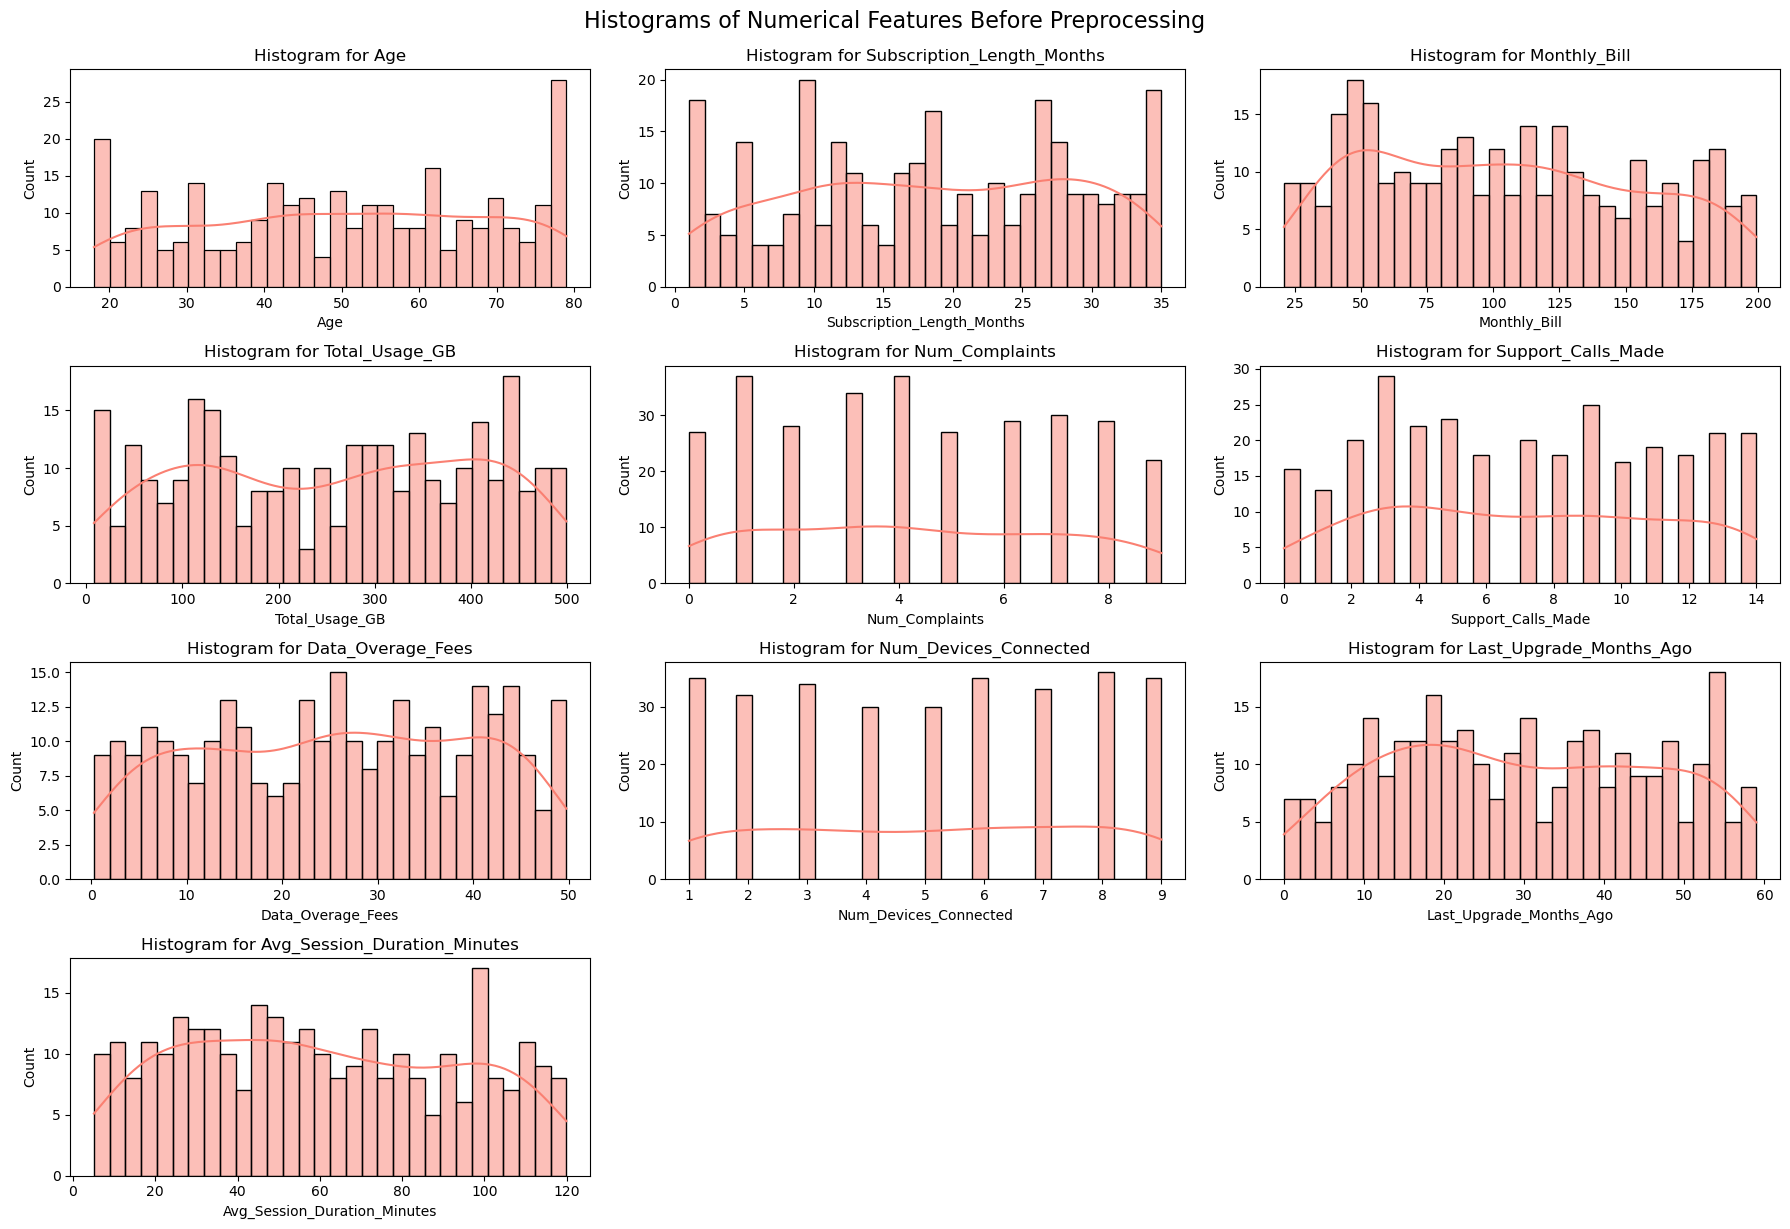

In [30]:

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.histplot(df[col], kde=True, color='salmon', bins=30)
    plt.title(f'Histogram for {col}')
    plt.tight_layout()
plt.suptitle("Histograms of Numerical Features Before Preprocessing", fontsize=16, y=1.02)
plt.show()


# Heatmap

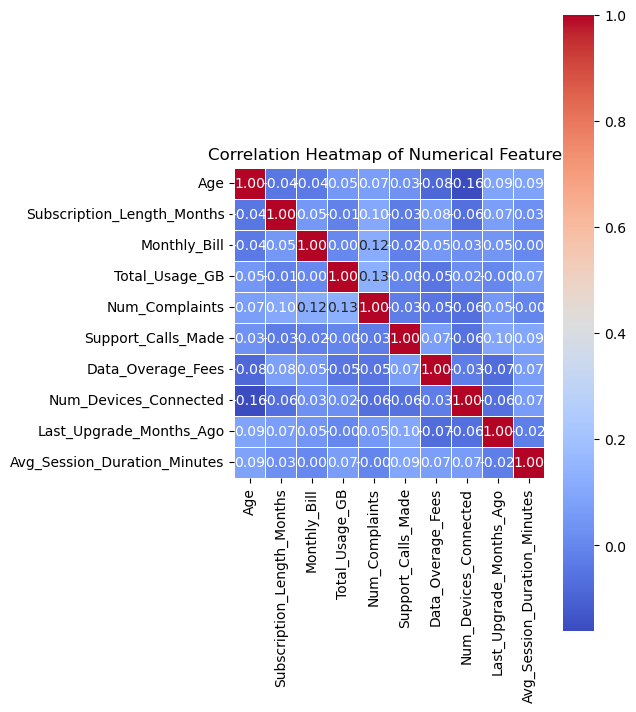

In [31]:
# Filter numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(5, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [32]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
# Define features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# SMOTE

In [34]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [35]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## LOGISTIC REGRESSION

In [36]:
# Train logistic regression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [37]:
# Evaluate by logistic regression
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7449


In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[41  9]
 [16 32]]


In [40]:
# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        50
           1       0.78      0.67      0.72        48

    accuracy                           0.74        98
   macro avg       0.75      0.74      0.74        98
weighted avg       0.75      0.74      0.74        98



# Applying PCA

In [41]:
from sklearn.decomposition import PCA
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred = log_reg_model.predict(X_val)

# Evaluation
print(" PCA Accuracy:", accuracy_score(y_val, y_pred))

 PCA Accuracy: 0.7166666666666667


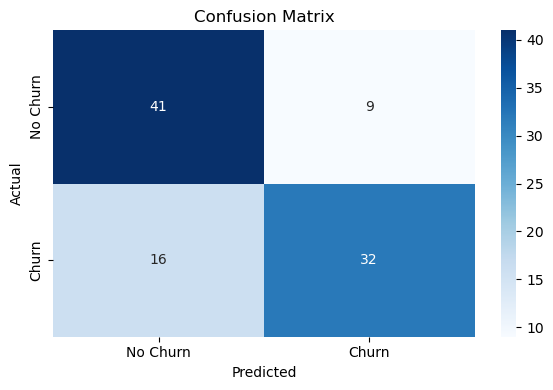

In [42]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'],  # Adjust labels as per your data
            yticklabels=['No Churn', 'Churn'])  # Adjust labels as per your data
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Random forest classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy
print(" RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matr)ix

cm=confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
print(classification_report(y_test, y_pred))

 RandomForestClassifier Accuracy: 0.8367346938775511
[[46  4]
 [12 36]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        50
           1       0.90      0.75      0.82        48

    accuracy                           0.84        98
   macro avg       0.85      0.83      0.84        98
weighted avg       0.85      0.84      0.84        98



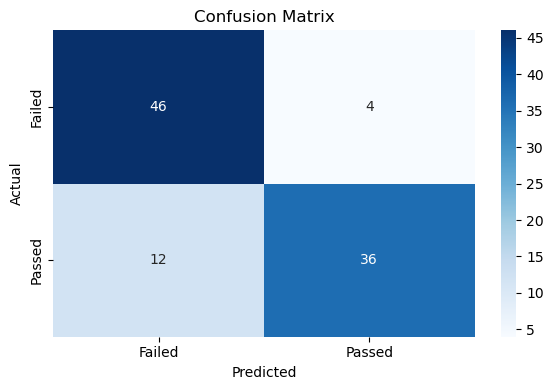

In [45]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Failed', 'Passed'],  # Adjust labels to reflect 'Passed_Training' values
            yticklabels=['Failed', 'Passed'])  # Adjust labels to reflect 'Passed_Training' values
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# SVM

In [46]:
from sklearn.svm import SVC
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# SVM model with best parameters
svm_model = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.6836734693877551


Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
 SVC Accuracy: 0.8673469387755102

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.93      0.79      0.85        48

    accuracy                           0.87        98
   macro avg       0.88      0.87      0.87        98
weighted avg       0.87      0.87      0.87        98



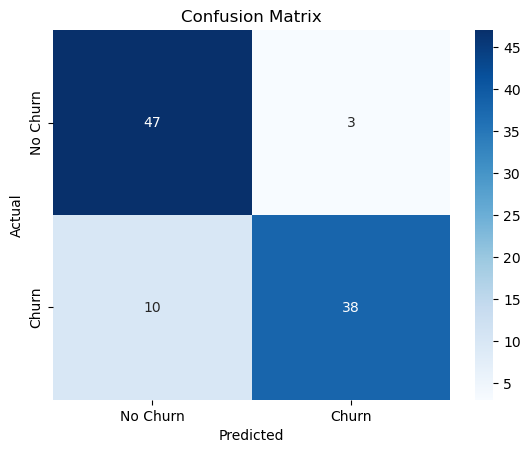

In [47]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

#  Apply SMOTE for class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid Search for best SVM params
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [3]
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
best_svm = grid.best_estimator_

# Predictions
y_pred = best_svm.predict(X_test)

# Evaluation
print("Best Parameters:", grid.best_params_)
print(" SVC Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [49]:
y_pred = model.predict(X_test)
y_pred

D:\software\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

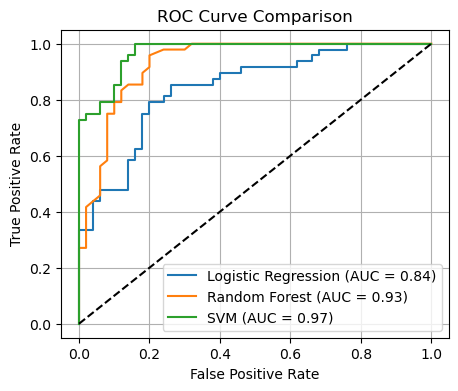

Best SVM Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rand_forest = RandomForestClassifier(random_state=42)

# SVM with GridSearch for best parameters
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [3]  # only for 'poly'
}
svm_model = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_

#  Train models
log_reg.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
best_svm.fit(X_train, y_train)

#  Predict probabilities
y_log_reg_proba = log_reg.predict_proba(X_test)[:, 1]
y_rf_proba = rand_forest.predict_proba(X_test)[:, 1]
y_svm_proba = best_svm.predict_proba(X_test)[:, 1]

#  Compute ROC and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_log_reg_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_proba)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(5, 4))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Step 12: Optional - print best SVM parameters
print("Best SVM Parameters:", grid_search.best_params_)
